# Introducere în Probabilitate și Statistică
În acest caiet, vom explora câteva dintre conceptele pe care le-am discutat anterior. Multe concepte din probabilitate și statistică sunt bine reprezentate în biblioteci majore pentru procesarea datelor în Python, cum ar fi `numpy` și `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Variabile aleatoare și distribuții  
Să începem prin a extrage un eșantion de 30 de valori dintr-o distribuție uniformă de la 0 la 9. Vom calcula, de asemenea, media și varianța.  


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Pentru a estima vizual câte valori diferite sunt în eșantion, putem reprezenta grafic **histograma**:


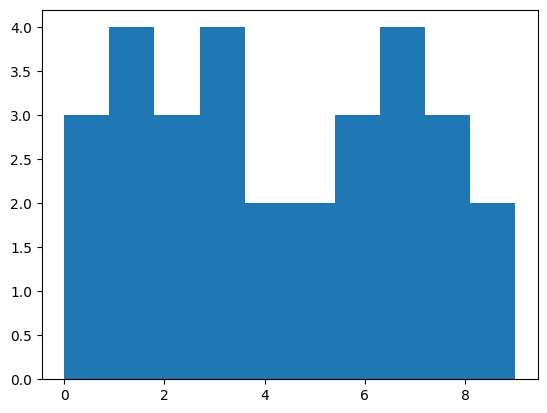

In [119]:
plt.hist(sample)
plt.show()

## Analizând Date Reale

Media și variația sunt foarte importante atunci când analizăm date din lumea reală. Să încărcăm datele despre jucătorii de baseball de la [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


> Folosim un pachet numit [**Pandas**](https://pandas.pydata.org/) aici pentru analiza datelor. Vom discuta mai multe despre Pandas și lucrul cu date în Python mai târziu în acest curs.

Să calculăm valorile medii pentru vârstă, înălțime și greutate:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Acum să ne concentrăm pe înălțime și să calculăm deviația standard și varianța:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


În plus față de medie, are sens să analizăm valoarea medianei și quartilele. Acestea pot fi vizualizate folosind un **box plot**:


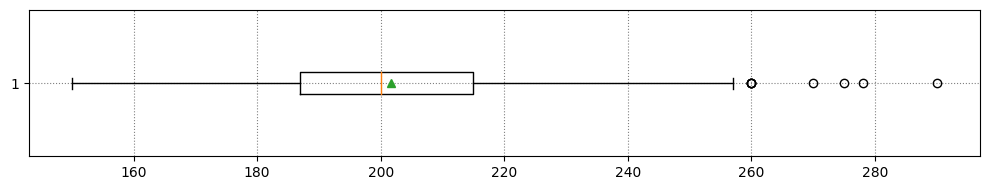

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Putem, de asemenea, să realizăm diagrame boxplot pentru subansambluri ale setului nostru de date, de exemplu, grupate după rolul jucătorului.


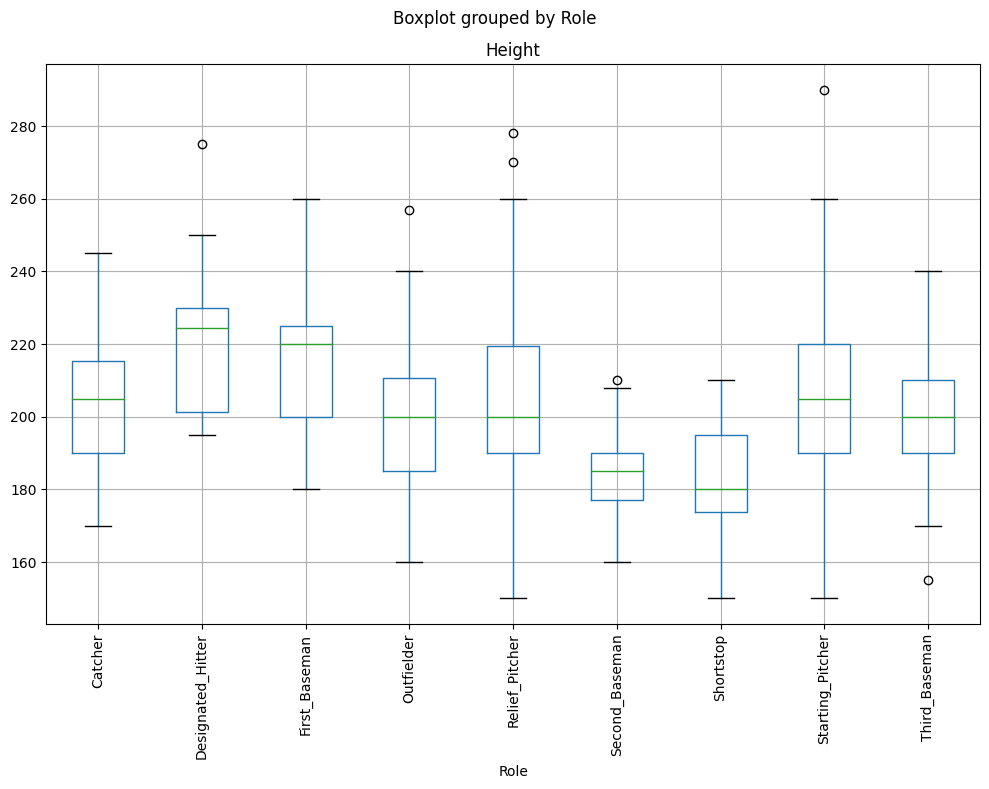

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Notă**: Acest diagram sugerează că, în medie, înălțimea primilor basiști este mai mare decât înălțimea celor de pe a doua bază. Mai târziu vom învăța cum putem testa această ipoteză într-un mod mai formal și cum să demonstrăm că datele noastre sunt semnificative din punct de vedere statistic pentru a susține acest lucru.

Vârsta, înălțimea și greutatea sunt toate variabile aleatoare continue. Ce crezi că este distribuția lor? O modalitate bună de a afla este să trasezi histograma valorilor:


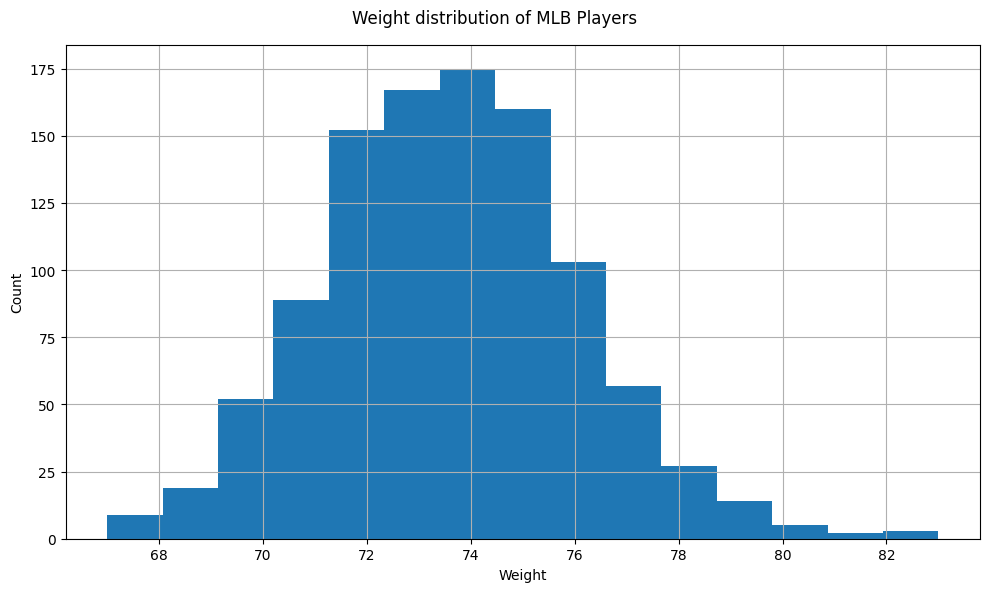

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Distribuție Normală

Să creăm un eșantion artificial de greutăți care urmează o distribuție normală cu aceeași medie și varianță ca datele noastre reale:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

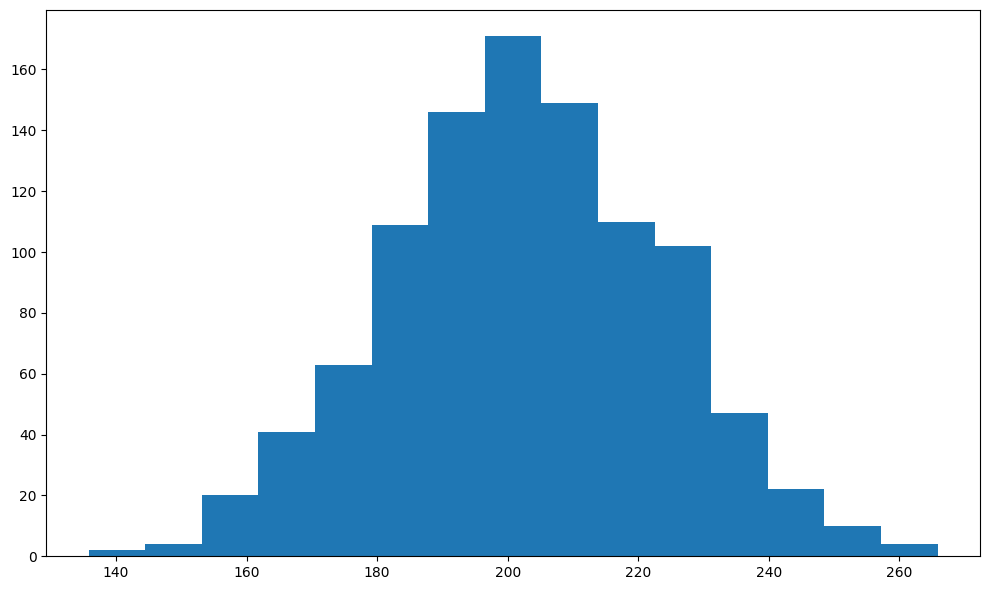

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

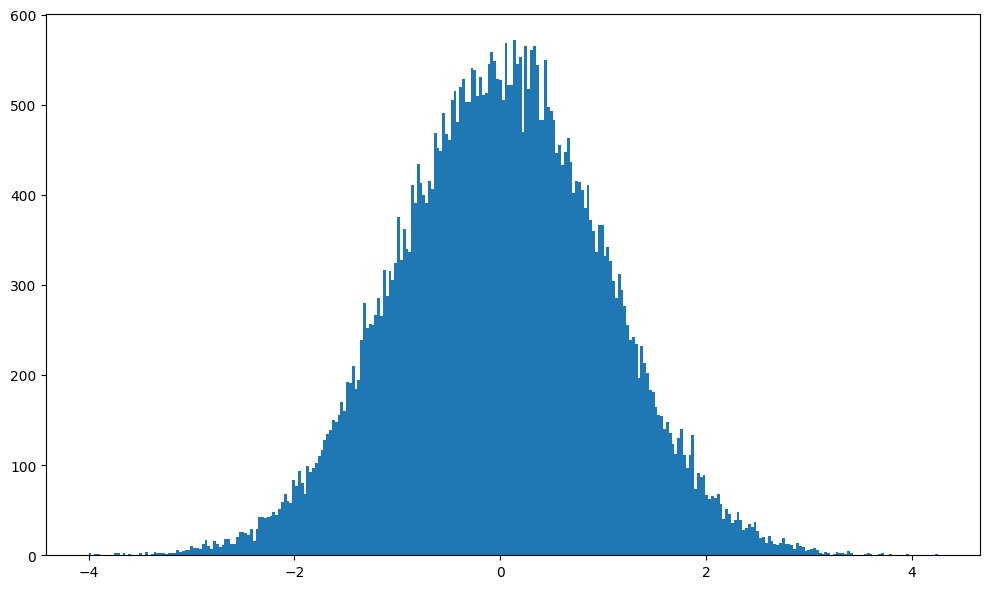

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Deoarece majoritatea valorilor din viața reală sunt distribuite normal, nu ar trebui să folosim un generator uniform de numere aleatoare pentru a genera date de eșantion. Iată ce se întâmplă dacă încercăm să generăm greutăți cu o distribuție uniformă (generată de `np.random.rand`):


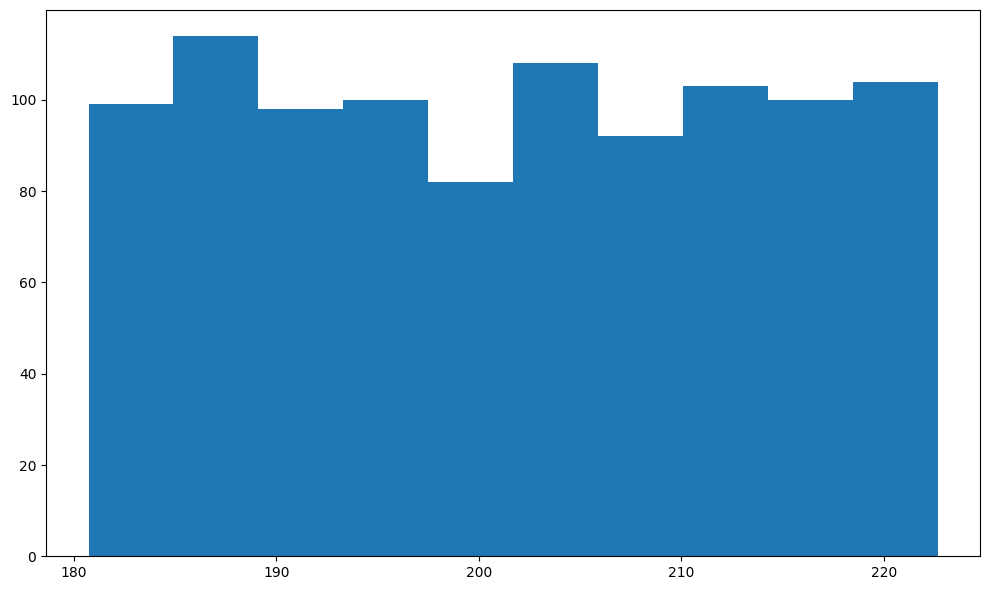

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Intervale de încredere

Acum să calculăm intervalele de încredere pentru greutățile și înălțimile jucătorilor de baseball. Vom folosi codul [din această discuție de pe stackoverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Testarea ipotezelor

Să explorăm diferitele roluri din setul nostru de date despre jucătorii de baseball:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Putem observa că intervalele nu se suprapun.

O modalitate statistică mai corectă de a demonstra ipoteza este utilizarea unui **test t de Student**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Cele două valori returnate de funcția `ttest_ind` sunt:
* p-value poate fi considerat probabilitatea ca două distribuții să aibă aceeași medie. În cazul nostru, este foarte mică, ceea ce înseamnă că există dovezi puternice care susțin că primii jucători de bază sunt mai înalți.
* t-value este valoarea intermediară a diferenței medii normalizate utilizată în testul t și este comparată cu o valoare prag pentru un nivel de încredere dat.


## Simularea unei distribuții normale cu teorema limitelor centrale

Generatorul pseudo-aleator din Python este conceput pentru a ne oferi o distribuție uniformă. Dacă dorim să creăm un generator pentru distribuția normală, putem folosi teorema limitelor centrale. Pentru a obține o valoare distribuită normal, vom calcula pur și simplu media unui eșantion generat uniform.


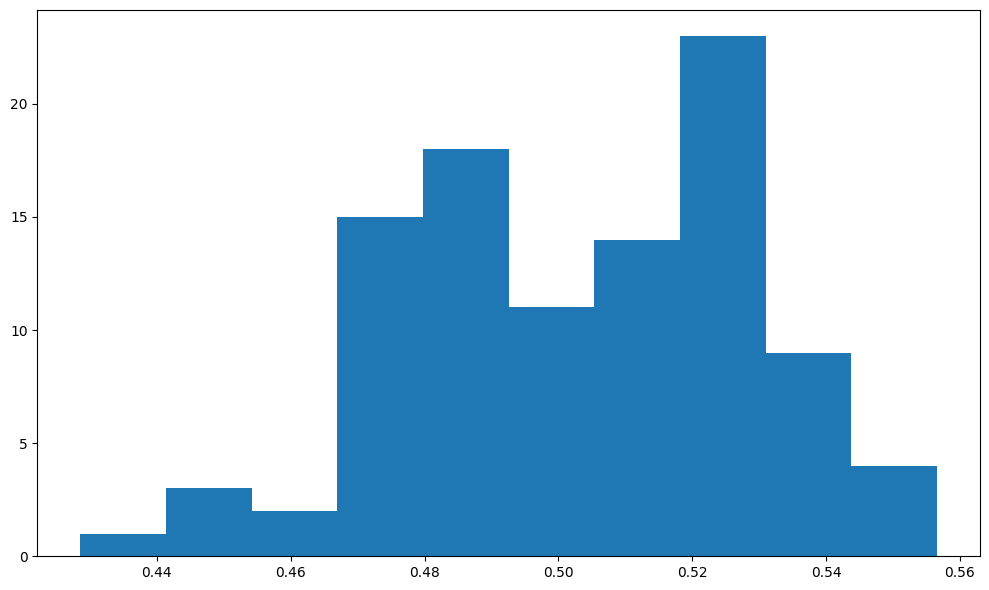

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Corelație și Corporația Malefică de Baseball

Corelația ne permite să găsim relații între secvențe de date. În exemplul nostru fictiv, să presupunem că există o corporație malefică de baseball care își plătește jucătorii în funcție de înălțimea lor - cu cât jucătorul este mai înalt, cu atât primește mai mulți bani. Să presupunem că există un salariu de bază de 1000 de dolari și un bonus suplimentar între 0 și 100 de dolari, în funcție de înălțime. Vom lua jucătorii reali din MLB și vom calcula salariile lor imaginare:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Să calculăm acum covarianța și corelația acestor secvențe. `np.cov` ne va oferi așa-numita **matrice de covarianță**, care este o extensie a covarianței la mai multe variabile. Elementul $M_{ij}$ al matricei de covarianță $M$ este o corelație între variabilele de intrare $X_i$ și $X_j$, iar valorile diagonale $M_{ii}$ reprezintă varianța lui $X_{i}$. În mod similar, `np.corrcoef` ne va oferi **matricea de corelație**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


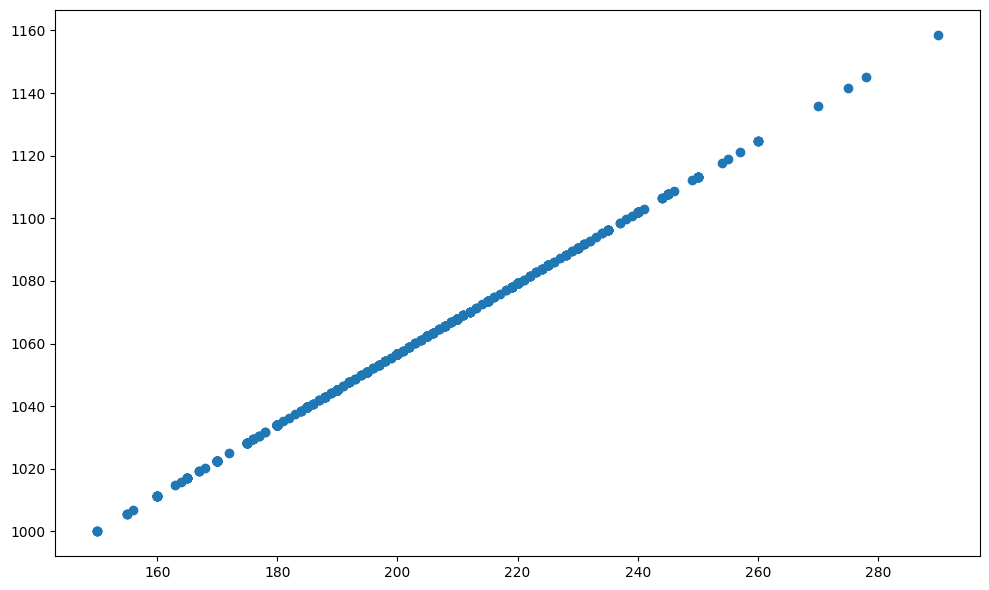

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


În acest caz, corelația este ușor mai mică, dar este totuși destul de mare. Acum, pentru a face relația și mai puțin evidentă, am putea dori să adăugăm un plus de aleatoriu prin adăugarea unei variabile aleatoare la salariu. Să vedem ce se întâmplă:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


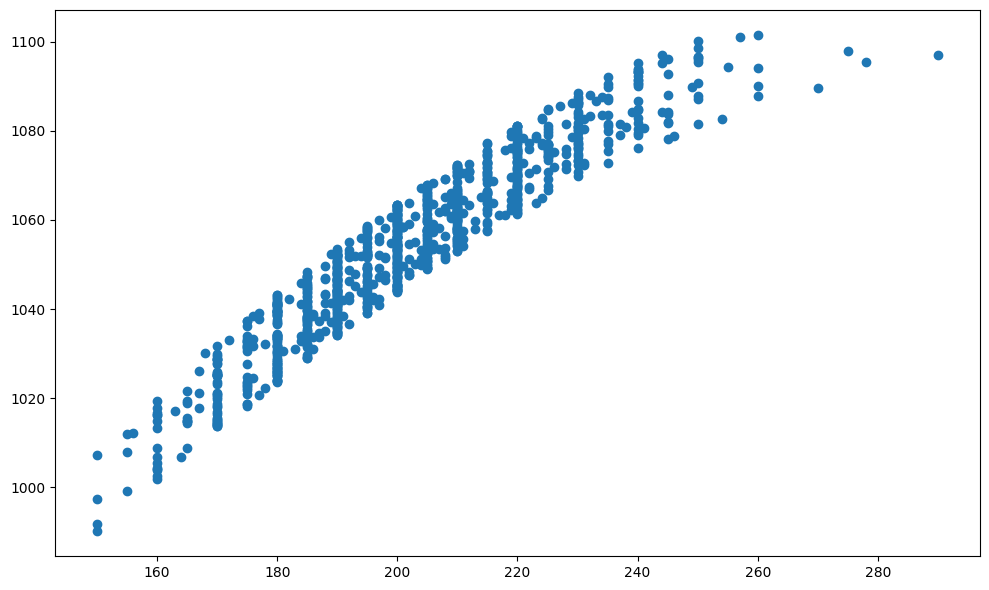

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Poți ghici de ce punctele se aliniază în linii verticale astfel?

Am observat corelația dintre un concept artificial, cum ar fi salariul, și variabila observată *înălțime*. Haide să vedem dacă cele două variabile observate, cum ar fi înălțimea și greutatea, se corelează și ele:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Din păcate, nu am obținut niciun rezultat - doar niște valori ciudate `nan`. Acest lucru se datorează faptului că unele dintre valorile din seria noastră sunt nedefinite, reprezentate ca `nan`, ceea ce face ca rezultatul operației să fie și el nedefinit. Privind matricea, putem observa că coloana `Weight` este cea problematică, deoarece corelația dintre valorile `Height` a fost calculată.

> Acest exemplu evidențiază importanța **pregătirii** și **curățării** datelor. Fără date adecvate, nu putem calcula nimic.

Să folosim metoda `fillna` pentru a completa valorile lipsă și să calculăm corelația:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

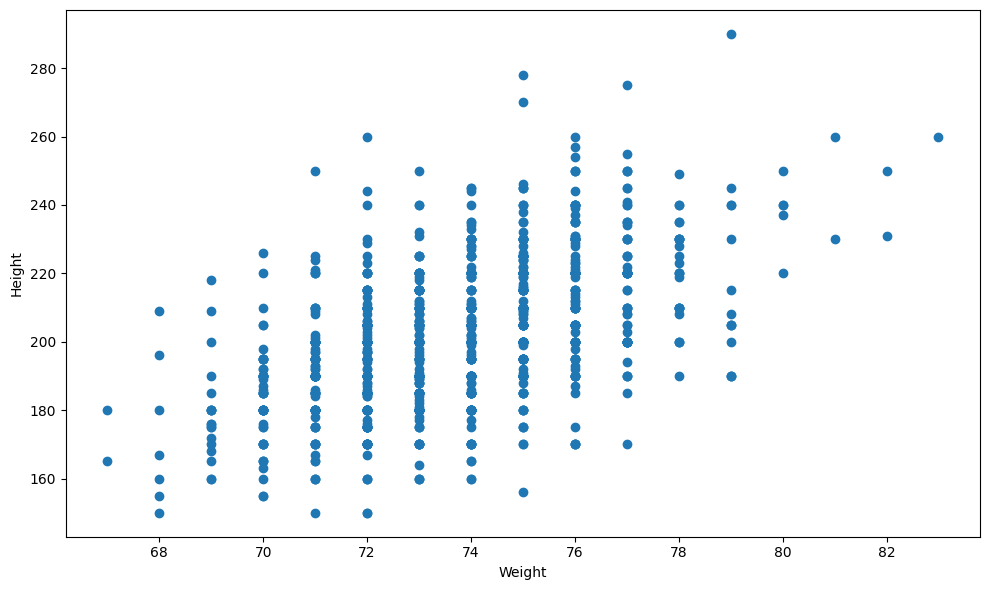

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Concluzie

În acest notebook am învățat cum să efectuăm operațiuni de bază pe date pentru a calcula funcții statistice. Acum știm cum să utilizăm un aparat solid de matematică și statistici pentru a demonstra anumite ipoteze și cum să calculăm intervale de încredere pentru variabile arbitrare, având un eșantion de date.



---

**Declinarea responsabilității**:  
Acest document a fost tradus utilizând serviciul de traducere AI [Co-op Translator](https://github.com/Azure/co-op-translator). Deși depunem eforturi pentru a asigura acuratețea, vă rugăm să aveți în vedere că traducerile automate pot conține erori sau inexactități. Documentul original în limba sa nativă ar trebui considerat sursa autoritară. Pentru informații critice, se recomandă traducerea profesională realizată de un specialist. Nu ne asumăm răspunderea pentru eventualele neînțelegeri sau interpretări greșite care pot apărea din utilizarea acestei traduceri.
